In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
start = '2020-01-01'
end = '2022-01-01'

In [3]:
data = yf.download(['BTC-USD', 'BNB-USD', 'XRP-USD', 'ETH-USD', 'ADA-USD', 'DOGE-USD'], start= start, end= end)

[*********************100%***********************]  6 of 6 completed


In [4]:
df = data.Close.copy()

In [5]:
df = df[['ADA-USD', 'BNB-USD', 'BTC-USD', 'XRP-USD', 'DOGE-USD', 'ETH-USD']]

In [6]:
df = df.pct_change()

In [7]:
df

,ADA-USD,BNB-USD,BTC-USD,XRP-USD,DOGE-USD,ETH-USD
Date,,,,,,
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,0.018663,-0.002809,0.000914,-0.001177,0.002466,0.009190
2020-01-02,-0.021131,-0.048365,-0.029819,-0.024000,-0.011805,-0.025931
2020-01-03,0.043632,0.048625,0.051452,0.029132,0.067695,0.053069
2020-01-04,0.012142,0.016915,0.008955,0.004310,0.044755,0.006690
...,...,...,...,...,...,...
2021-12-27,0.039056,0.028604,-0.003328,0.005432,-0.012183,-0.007322
2021-12-28,-0.073136,-0.049256,-0.060259,-0.079060,-0.072390,-0.058613
2021-12-29,-0.050953,-0.039122,-0.024042,-0.042494,-0.036481,-0.045348


In [8]:
df = df.dropna(thresh=2) # treshold =2 คือถ้ามีข้อมูลไม่ถึง2 ให้ดรอปเลย

In [9]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [10]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [12]:
# initiate model
model = Sequential()
model.add(Dense(1, activation= None, input_dim= 5))
model.add(Dense(1))
    # compile model
#model.compile(loss='mean_squared_error')
#model.summary()


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [14]:
from keras.utils.vis_utils import plot_model

In [22]:
plot_model(model, to_file= 'model.plot.png', show_shapes= True, show_layer_names= True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [26]:
model.compile(optimizer='ADAM', loss='MeanSquaredError', metrics=['accuracy'])

In [29]:
history = model.fit(X_train, y_train, epochs=50, batch_size=2)

Epoch 1/50
274/274 [==============================] - 0s 721us/step - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 2/50
274/274 [==============================] - 0s 599us/step - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 3/50
274/274 [==============================] - 0s 595us/step - loss: 0.0026 - accuracy: 0.0000e+00
Epoch 4/50
274/274 [==============================] - 0s 632us/step - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 5/50
274/274 [==============================] - 0s 650us/step - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 6/50
274/274 [==============================] - 0s 679us/step - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 7/50
274/274 [==============================] - 0s 657us/step - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 8/50
274/274 [==============================] - 0s 667us/step - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 9/50
274/274 [==============================] - 0s 692us/step - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 10/50
274/274 [=========================

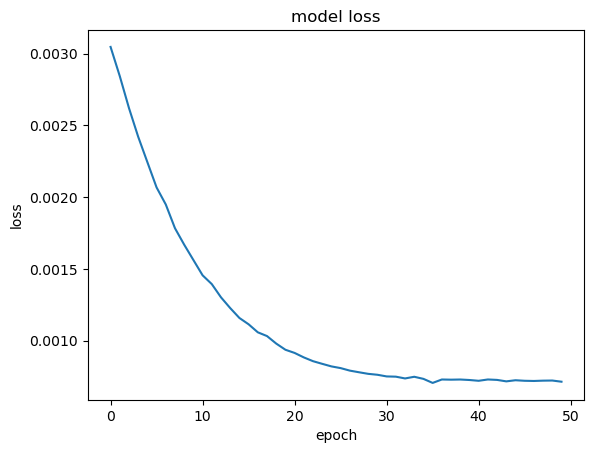

In [30]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [31]:
model.predict(X_test)

array([[-0.00399611],
       [ 0.05713139],
       [ 0.02357377],
       [ 0.01999755],
       [ 0.00097444],
       [-0.00563593],
       [ 0.00940509],
       [-0.05289927],
       [-0.05325008],
       [ 0.06552246],
       [-0.00574406],
       [ 0.04642862],
       [-0.04052763],
       [ 0.00635194],
       [ 0.01996394],
       [-0.01175813],
       [-0.03364721],
       [-0.03507305],
       [ 0.02946435],
       [-0.00939522],
       [-0.03364926],
       [-0.02786862],
       [ 0.02094607],
       [-0.06232   ],
       [-0.13097161],
       [ 0.08663813],
       [ 0.03410008],
       [ 0.02736301],
       [ 0.03352458],
       [ 0.0467776 ],
       [-0.009862  ],
       [ 0.01130829],
       [ 0.02893167],
       [-0.01876709],
       [ 0.03610934],
       [-0.05662094],
       [ 0.04889295],
       [ 0.00220512],
       [-0.08269072],
       [ 0.07669026],
       [-0.04728919],
       [-0.02572323],
       [ 0.00908206],
       [-0.11756739],
       [-0.01790578],
       [-0

In [32]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 798us/step - loss: 0.0011 - accuracy: 0.0000e+00


[0.0011139421258121729, 0.0]

In [34]:
y_test

Date
2020-07-15   -0.007443
2020-07-06    0.060816
2020-01-15    0.001659
2020-02-01    0.019504
2021-01-25   -0.048286
                ...   
2020-11-06    0.098177
2020-01-22   -0.008268
2021-10-12   -0.014887
2021-02-28   -0.030086
2020-02-05    0.079152
Name: ETH-USD, Length: 183, dtype: float64